HEART DISEASE PREDICTOR 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv('dataset heart disease.csv')

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
X = df.drop('target', axis=1).values
y = df['target'].values.reshape(-1, 1)

In [8]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape 
        self.W = np.zeros((self.n, 1))
        self.b = 0 
        self.costs = []
        
        for i in range(self.n_iter):
            z = np.dot(X, self.W) + self.b
            
            A = self.sigmoid(z)
            cost = -np.mean(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
            dW = np.dot(X.T, (A - y)) / self.m
            db = np.mean(A - y)
            
            self.W -= self.lr * dW
            self.b -= self.lr * db
            self.costs.append(cost)
            
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")
            
    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        A = self.sigmoid(z)
        return (A > 0.5).astype(int)        

In [11]:
model = LogisticRegressionScratch(lr=0.01, n_iter=3000)
model.fit(X_train, y_train)

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.5117
Iteration 200: Cost = 0.4530
Iteration 300: Cost = 0.4277
Iteration 400: Cost = 0.4147
Iteration 500: Cost = 0.4071
Iteration 600: Cost = 0.4024
Iteration 700: Cost = 0.3993
Iteration 800: Cost = 0.3972
Iteration 900: Cost = 0.3957
Iteration 1000: Cost = 0.3946
Iteration 1100: Cost = 0.3937
Iteration 1200: Cost = 0.3931
Iteration 1300: Cost = 0.3926
Iteration 1400: Cost = 0.3923
Iteration 1500: Cost = 0.3920
Iteration 1600: Cost = 0.3918
Iteration 1700: Cost = 0.3916
Iteration 1800: Cost = 0.3914
Iteration 1900: Cost = 0.3913
Iteration 2000: Cost = 0.3912
Iteration 2100: Cost = 0.3911
Iteration 2200: Cost = 0.3911
Iteration 2300: Cost = 0.3910
Iteration 2400: Cost = 0.3910
Iteration 2500: Cost = 0.3909
Iteration 2600: Cost = 0.3909
Iteration 2700: Cost = 0.3909
Iteration 2800: Cost = 0.3908
Iteration 2900: Cost = 0.3908


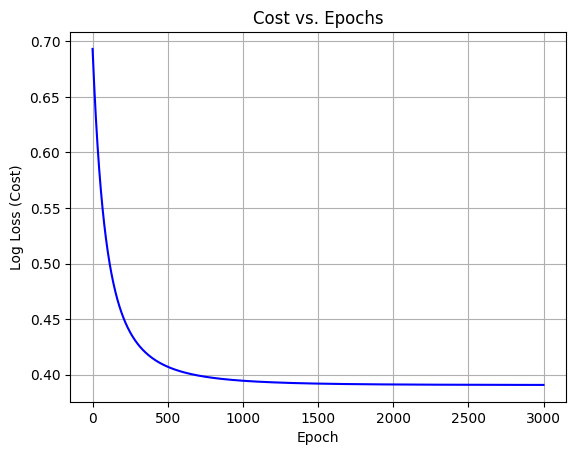

In [12]:
plt.plot(range(len(model.costs)), model.costs, color='blue')
plt.title('Cost vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss (Cost)')
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))


 Accuracy: 0.8571428571428571
 Precision: 0.8702290076335878
 Recall: 0.8702290076335878
 F1 Score: 0.8702290076335878

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.87      0.87      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.5146
Iteration 200: Cost = 0.4579
Iteration 300: Cost = 0.4340
Iteration 400: Cost = 0.4221
Iteration 500: Cost = 0.4155
Iteration 600: Cost = 0.4115
Iteration 700: Cost = 0.4090
Iteration 800: Cost = 0.4074
Iteration 900: Cost = 0.4063


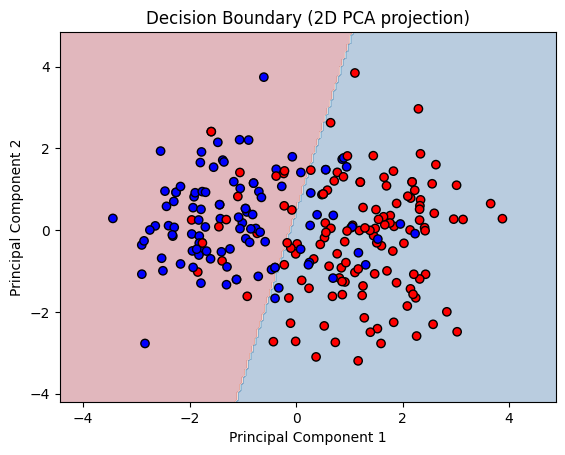

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

model_2d = LogisticRegressionScratch(lr=0.01, n_iter=1000)
model_2d.fit(X_train_2d, y_train)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_2d.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test.ravel(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [15]:
import numpy as np

def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        _, y = zip(*group)
        for class_val in classes:
            p = y.count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[0][index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def get_split(dataset):
    class_values = list(set(row[1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0][0])):
        for row in dataset:
            groups = test_split(index, row[0][index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[0][index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}


In [16]:
def to_terminal(group):
    outcomes = [row[1] for row in group]
    return max(set(outcomes), key=outcomes.count)

def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)

    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)


In [17]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


In [18]:
import random
from collections import Counter

def subsample(dataset, ratio):
    sample = []
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = random.randrange(len(dataset))
        sample.append(dataset[index])
    return sample

def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return Counter(predictions).most_common(1)[0][0]

def random_forest(train, test, max_depth, min_size, sample_size, n_trees):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)

    predictions = [bagging_predict(trees, row[0]) for row in test]
    actuals = [row[1] for row in test]
    accuracy = sum([1 for i in range(len(predictions)) if predictions[i] == actuals[i]]) / len(actuals)
    print(f" Random Forest Accuracy: {accuracy * 100:.2f}%")
    return predictions, actuals


In [19]:



data = list(zip(X_train, y_train.ravel()))
test = list(zip(X_test, y_test.ravel()))


In [20]:
preds, trues = random_forest(
    train=data,
    test=test,
    max_depth=10,
    min_size=5,
    sample_size=0.8,
    n_trees=10
)


 Random Forest Accuracy: 88.66%


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds)
recall = recall_score(trues, preds)
f1 = f1_score(trues, preds)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(trues, preds))
plt.figure(figsize=(6, 4))  

Random Forest Accuracy: 0.8866
Random Forest Precision: 0.9000
Random Forest Recall: 0.8931
Random Forest F1 Score: 0.8966

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.90      0.89      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [22]:
import numpy as np
from collections import Counter

class KNearestNeighborsScratch:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)


            k_indices = distances.argsort()[:self.k]

            k_labels = self.y_train[k_indices]

            most_common = Counter(k_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)


In [23]:
knn = KNearestNeighborsScratch(k=5)
knn.fit(X_train, y_train.ravel())
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8865546218487395


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8866
KNN Precision: 0.8714
KNN Recall: 0.9313
KNN F1 Score: 0.9004

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       0.87      0.93      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.88      0.88       238
weighted avg       0.89      0.89      0.89       238



In [25]:
def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        labels = [row[-1] for row in group]
        for class_val in classes:
            p = labels.count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini


In [26]:
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


In [27]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = None, None, float('inf'), None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}


In [28]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)



In [29]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)

    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)


In [30]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root


In [31]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


In [32]:
train_data = [list(x) + [y] for x, y in zip(X_train, y_train.ravel())]
test_data = [list(x) + [y] for x, y in zip(X_test, y_test.ravel())]

tree = build_tree(train_data, max_depth=10, min_size=5)

predictions = [predict(tree, row) for row in test_data]

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, predictions))


Decision Tree Accuracy: 0.8739495798319328


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Decision Tree Accuracy:  {accuracy:.4f}")
print(f"Decision Tree Precision: {precision:.4f}")
print(f"Decision Tree Recall:    {recall:.4f}")
print(f"Decision Tree F1 Score:  {f1:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, predictions))


Decision Tree Accuracy:  0.8739
Decision Tree Precision: 0.9040
Decision Tree Recall:    0.8626
Decision Tree F1 Score:  0.8828

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.90      0.86      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.88      0.87       238
weighted avg       0.88      0.87      0.87       238

